In [5]:
# Basic Packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Additional Packages
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler # Scales data for PCA
from sklearn.decomposition import PCA # PCA package
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold

## Import Data and Explore

In [6]:
df = pd.read_excel("data.xlsx")

In [7]:
df.columns

Index(['subject', 'age', 'label', 'RBC2barrier', 'Inflation', 'bandwidth',
       'ven_defect', 'ven_low', 'ven_high', 'ven_SNR', 'ven_mean',
       'ven_median', 'ven_SD', 'bar_defect', 'bar_low', 'bar_high', 'bar_SNR',
       'bar_mean', 'bar_median', 'bar_SD', 'bar_negative', 'rbc_defect',
       'rbc_low', 'rbc_high', 'rbc_SNR', 'rbc_mean', 'rbc_median', 'rbc_SD',
       'rbc_negative', 'fvc', 'fe1', 'fev1-fvc', 'fev25-75'],
      dtype='object')

In [8]:
df['label'].value_counts()

IPF     71
NSIP    36
Name: label, dtype: int64

In [9]:
df = df.dropna(subset = ['label'])
df.isna().mean().round(4) * 100

subject           0.00
age             100.00
label             0.00
RBC2barrier      16.82
Inflation        16.82
bandwidth        16.82
ven_defect       16.82
ven_low          16.82
ven_high         16.82
ven_SNR          16.82
ven_mean         16.82
ven_median       16.82
ven_SD           16.82
bar_defect       16.82
bar_low          16.82
bar_high         16.82
bar_SNR          16.82
bar_mean         16.82
bar_median       16.82
bar_SD           16.82
bar_negative     16.82
rbc_defect       16.82
rbc_low          16.82
rbc_high         16.82
rbc_SNR          16.82
rbc_mean         16.82
rbc_median       16.82
rbc_SD           16.82
rbc_negative     16.82
fvc              20.56
fe1              20.56
fev1-fvc         20.56
fev25-75         22.43
dtype: float64

In [6]:
df.drop(columns = ['age'], inplace = True)

## Delete Rows of Missing Data

In [10]:
total_df = df.dropna()

In [11]:
total_df['label'] = pd.Categorical(total_df['label'])
total_df['code_label'] = total_df.label.cat.codes # add column for binary numeric label 
total_df.dtypes

subject           object
age              float64
label           category
RBC2barrier      float64
Inflation        float64
bandwidth        float64
ven_defect       float64
ven_low          float64
ven_high         float64
ven_SNR          float64
ven_mean         float64
ven_median       float64
ven_SD           float64
bar_defect       float64
bar_low          float64
bar_high         float64
bar_SNR          float64
bar_mean         float64
bar_median       float64
bar_SD           float64
bar_negative     float64
rbc_defect       float64
rbc_low          float64
rbc_high         float64
rbc_SNR          float64
rbc_mean         float64
rbc_median       float64
rbc_SD           float64
rbc_negative     float64
fvc              float64
fe1              float64
fev1-fvc         float64
fev25-75         float64
code_label          int8
dtype: object

In [12]:
col_name = ['RBC2barrier', 'Inflation', 'bandwidth',
       'ven_defect', 'ven_low', 'ven_high', 'ven_SNR', 'ven_mean',
       'ven_median', 'ven_SD', 'bar_defect', 'bar_low', 'bar_high', 'bar_SNR',
       'bar_mean', 'bar_median', 'bar_SD', 'bar_negative', 'rbc_defect',
       'rbc_low', 'rbc_high', 'rbc_SNR', 'rbc_mean', 'rbc_median', 'rbc_SD',
       'rbc_negative', 'fvc', 'fe1', 'fev1-fvc', 'fev25-75']

In [14]:
for name in col_name:
    sns.catplot(x = name, y = "label", kind = 'box', data = total_df)
    plt.suptitle('Boxplot of ' + name + ' Grouped by Label')
    plt.savefig('BME590.12_boxplot_'+name+'.png' )

ValueError: min() arg is an empty sequence

C:\Users\chope\Anaconda3\lib\site-packages\seaborn\axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
C:\Users\chope\Anaconda3\lib\site-packages\seaborn\axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
C:\Users\chope\Anaconda3\lib\site-packages\seaborn\axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

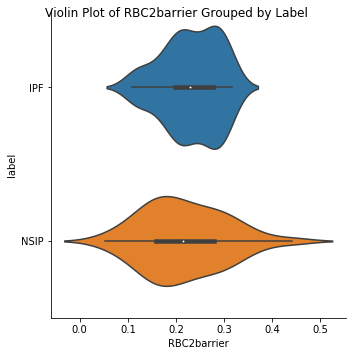

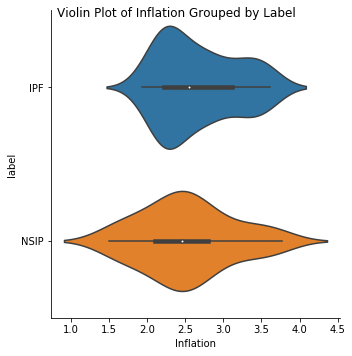

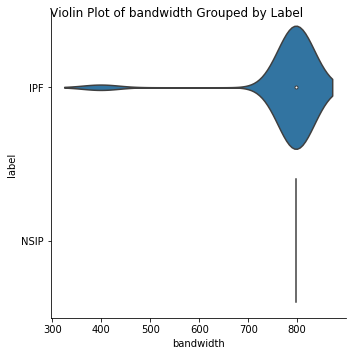

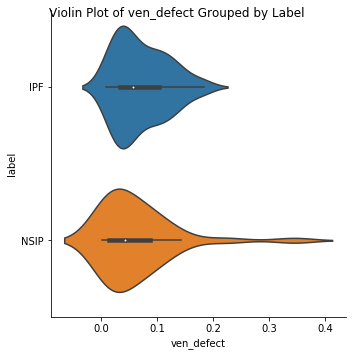

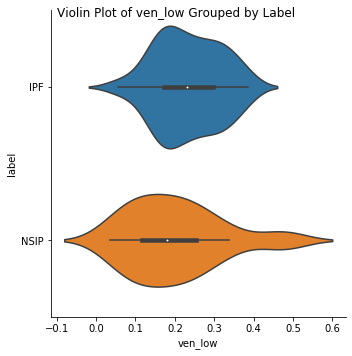

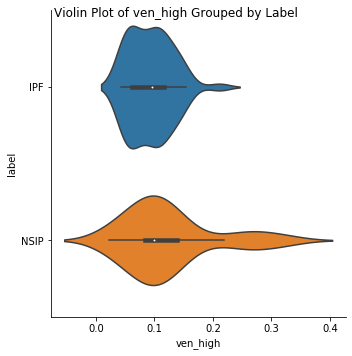

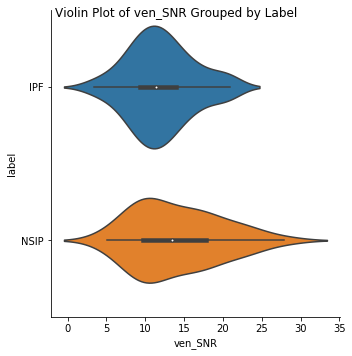

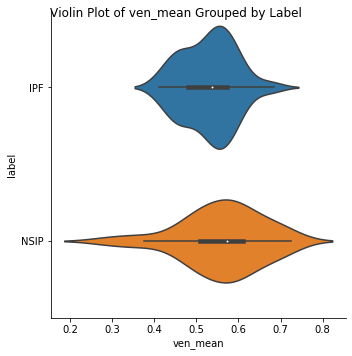

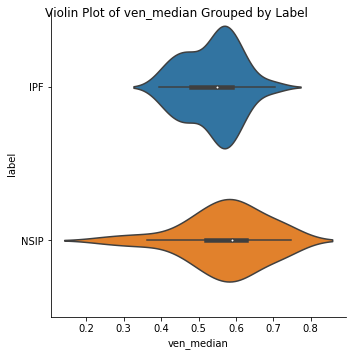

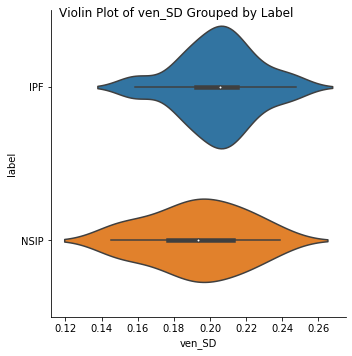

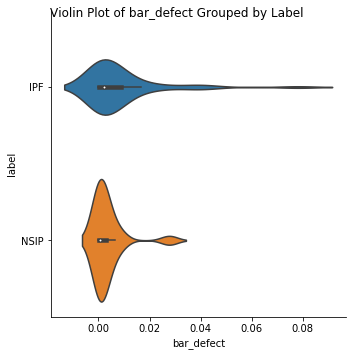

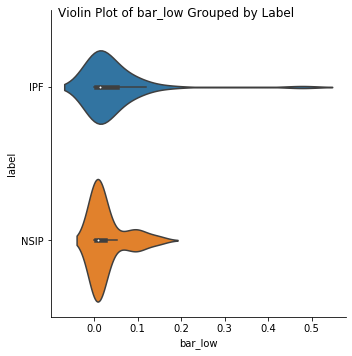

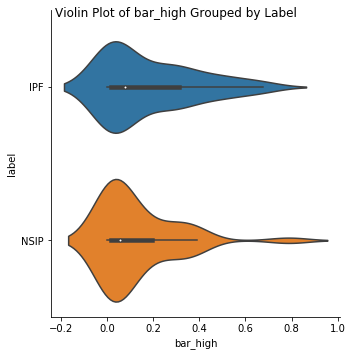

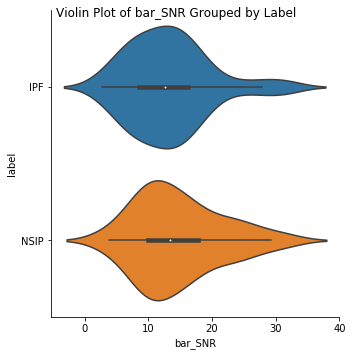

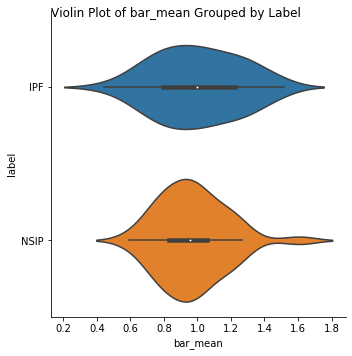

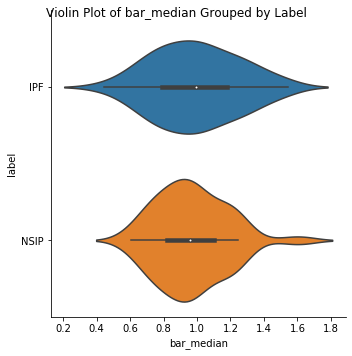

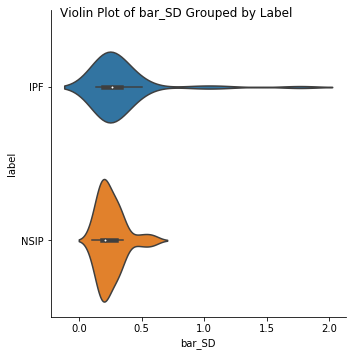

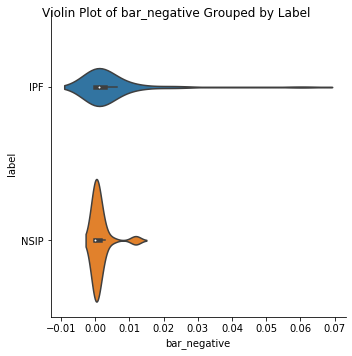

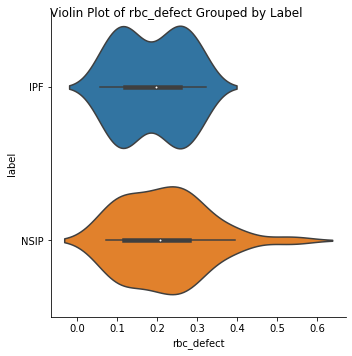

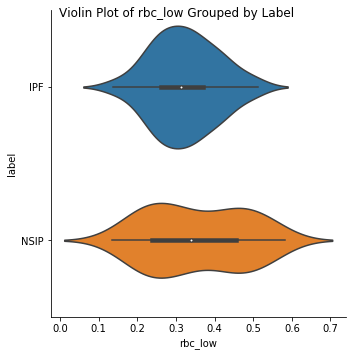

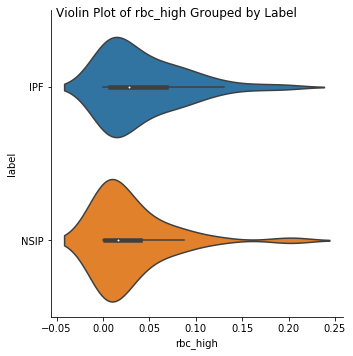

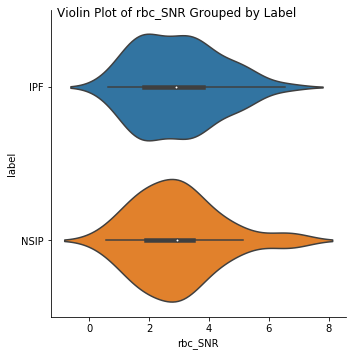

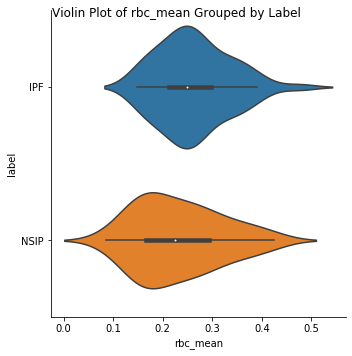

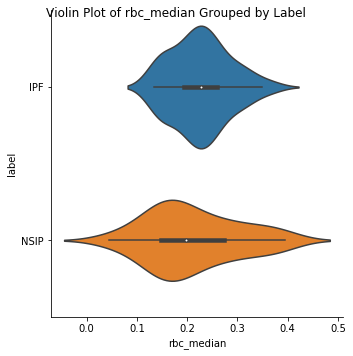

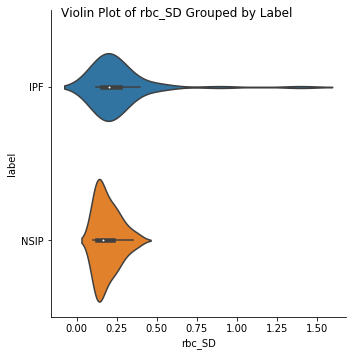

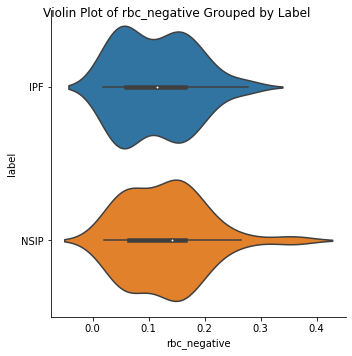

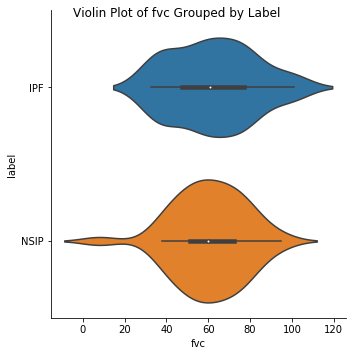

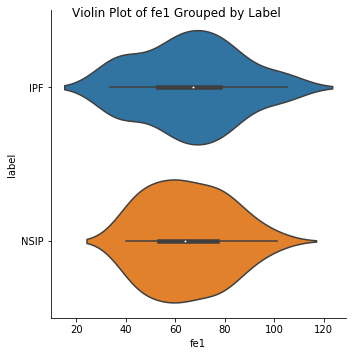

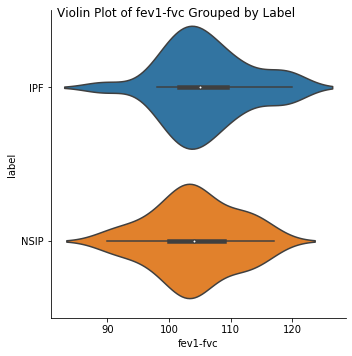

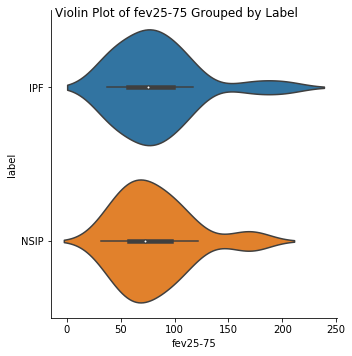

In [30]:
for name in col_name:
    sns.catplot(x = name, y = "label", kind = 'violin', data = total_df)
    plt.suptitle('Violin Plot of ' + name + ' Grouped by Label')
    plt.savefig('BME590.12_violinplot_'+name+'.png' )

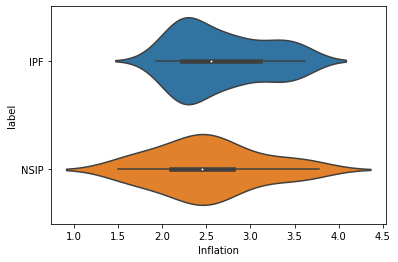

In [12]:
sns.violinplot(x = 'Inflation', y = "label", data = total_df)

### PCA 

In [33]:
features = total_df.get_values()
features = features[2:-1]
features

AttributeError: 'DataFrame' object has no attribute 'get_values'

In [ ]:

# Separating out the features
x = total_df.loc[:, features].values

# Separating out the target label
y = total_df.loc[:,['label']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, total_df[['label']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['IPF', 'NSIP']
colors = ['orange', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

c= df[df['label']=='IPF'];
n= df[df['label']=='NSIP'];

ax.scatter(c['ven_mean'], c['bar_mean'], c['rbc_mean'], c='b', marker='^')
ax.scatter(n['ven_mean'], n['bar_mean'], n['rbc_mean'], c='k', marker='x')

ax.set_xlabel('ven_mean')
ax.set_ylabel('bar_mean')
ax.set_zlabel('rbc_mean')

plt.show()

In [ ]:
"""
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.scatter(h['ven_mean'], h['bar_mean'], c='r', marker='o')
ax.scatter(c['ven_mean'], c['bar_mean'], c='b', marker='^')
ax.scatter(n['ven_mean'], n['bar_mean'], c='k', marker='x')

ax.set_xlabel('ven_mean')
ax.set_ylabel('bar_mean')
"""

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.scatter(h['bar_mean'], h['rbc_mean'], c='r', marker='o')
ax.scatter(c['bar_mean'], c['rbc_mean'], c='b', marker='^')
ax.scatter(n['bar_mean'], n['rbc_mean'], c='k', marker='x')

ax.set_xlabel('bar_mean')
ax.set_ylabel('rbc_mean')

In [ ]:
# Maximum number of components min(features, observations-1)

max_num_PCA=min(len(features),len(total_df.index))
max_num_PCA

In [ ]:
### Just copy Peter code cause too lazy and why not


# Separating out the features
x = total_df.loc[:, features].values

# Separating out the target label
y = total_df.loc[:,['label']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)


pca = PCA(n_components=max_num_PCA)
principalComponents = pca.fit(x)

In [ ]:
# ref : https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

plt.plot(range(1,max_num_PCA+1),np.cumsum(principalComponents.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Scree Plot')


In [ ]:
# find number of component that explain 90% 
# the code refer to https://stackoverflow.com/questions/9706041/finding-index-of-an-item-closest-to-the-value-in-a-list-thats-not-entirely-sort

cumsum=np.cumsum(principalComponents.explained_variance_ratio_)

# Plus one because index in python start with 0
min_number=min(range(len(cumsum)), key=lambda i: abs(cumsum[i]-0.9))+1
min_number

## Classical Machine Learning

### SVM

In [ ]:
svm_data=total_df.drop(['subject','label'], axis=1)

In [ ]:
X = svm_data.drop('code_label', axis=1).values
y = svm_data['code_label'].values

In [ ]:
svm_data['code_label'].value_counts()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Ref
https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X = svm_data.drop('code_label', axis=1).values
y = svm_data['code_label'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
pca = PCA(n_components=max_num_PCA)
principalComponents = pca.fit(X_train)

In [ ]:
X_train_all = principalComponents.transform(X_train)
X_test_all = principalComponents.transform(X_test)

In [ ]:
accuracys=[];

for number_comp in range(max_num_PCA):
    X_train = X_train_all[:,:number_comp+1]
    X_test = X_test_all[:,:number_comp+1]
    svclassifier = SVC(kernel='rbf')
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    accuracys.append(accuracy_score(y_test, y_pred))



In [ ]:
plt.plot(range(1,max_num_PCA+1),accuracys)
plt.xlabel('number of components')
plt.ylabel('accuracy')

In [ ]:
print('We achieve the maximum accuracy at '+str(round(max(accuracys)*100,2))+'% when using '+str(np.argmax(accuracys)+1)+' number of components')

In [ ]:
## However, since the test set is very small it is subjected to resample error so we will do K fold cross 
## validation it is only 22 that is so small
X_test.shape

In [ ]:
# Ref https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
# Easier way to do if we not use PCA is cross_val_score(clf, X, y, cv=5) but we need to split X first we cannot
# do this way

accuracys=[];

kf = KFold(n_splits=5)

for number_comp in range(max_num_PCA):
    accuracy_k=[];
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        
        pca = PCA(n_components=number_comp+1)
        principalComponents = pca.fit(X_train)
        
        X_train = principalComponents.transform(X_train)
        X_test = principalComponents.transform(X_test)
        
        svclassifier = SVC(kernel='rbf')
        svclassifier.fit(X_train, y_train)
        y_pred = svclassifier.predict(X_test)
        accuracy_k.append(accuracy_score(y_test, y_pred))
    accuracys.append(np.mean(accuracy_k))



In [ ]:
plt.plot(range(1,max_num_PCA+1),accuracys)
plt.xlabel('number of components')
plt.ylabel('accuracy')

In [ ]:
print('We achieve the maximum accuracy at '+str(round(max(accuracys)*100,2))+'% when using '+str(np.argmax(accuracys)+1)+' number of components')

# EDA for Proposal

## Import Summary Statistics of Segmented Image Data